In [1]:
import sys
sys.version

'3.6.3 (default, Oct  3 2017, 21:45:48) \n[GCC 7.2.0]'

In [2]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

    100% |████████████████████████████████| 592.3MB 1.0MB/s 


In [3]:
!pip3 install torchvision

    100% |████████████████████████████████| 61kB 3.8MB/s 
    100% |████████████████████████████████| 2.0MB 8.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [9]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2).sum()))

def forward(x, e):
    """Forward pass for our fuction"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-6

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)

# Model parameter and it's true value
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)
y = forward(x, exp)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 200):
    print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data[0])
    exp_history.append(y_hat.data[0])
    
    # Compute gradients
    loss.backward()
    
    print("loss = %s" % loss.data[0])
    print("exp = %s" % exp_hat.data[0])
    
    # Update model parameters
    exp_hat.data -= learning_rate * exp_hat.grad.data
    exp_hat.grad.data.zero_()

Iteration 0
loss = 37939.03515625
exp = 4.0
Iteration 1
loss = 14605.07421875
exp = 3.575826644897461
Iteration 2
loss = 9995.984375
exp = 3.409923791885376
Iteration 3
loss = 7658.662109375
exp = 3.2948966026306152
Iteration 4
loss = 6211.9716796875
exp = 3.2056338787078857
Iteration 5
loss = 5218.74365234375
exp = 3.1323015689849854
Iteration 6
loss = 4490.94921875
exp = 3.069896697998047
Iteration 7
loss = 3933.014892578125
exp = 3.015493154525757
Iteration 8
loss = 3490.7978515625
exp = 2.967219352722168
Iteration 9
loss = 3131.17529296875
exp = 2.9238009452819824
Iteration 10
loss = 2832.68017578125
exp = 2.884329080581665
Iteration 11
loss = 2580.75341796875
exp = 2.8481311798095703
Iteration 12
loss = 2365.158447265625
exp = 2.814695358276367
Iteration 13
loss = 2178.474365234375
exp = 2.7836220264434814
Iteration 14
loss = 2015.189697265625
exp = 2.75459361076355
Iteration 15
loss = 1871.118896484375
exp = 2.727353096008301
Iteration 16
loss = 1743.025390625
exp = 2.70168948173

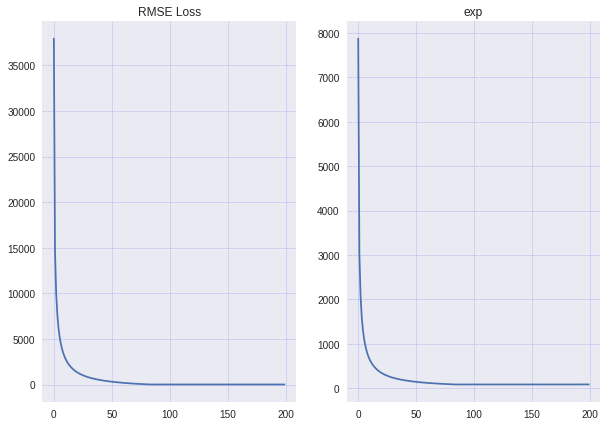

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(loss_history, exp_history):
    fig = plt.figure(figsize=(10, 7))
    fig.add_axes()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='2')
        
    ax1.set_title('RMSE Loss')
    ax2.set_title('exp')
    ax1.plot(np.arange(len(loss_history)), loss_history)
    ax2.plot(np.arange(len(exp_history)), exp_history)
    
plot_results(loss_history, exp_history)
    
  
  

In [12]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2)))

def forward(x, e):
    """Forward pass for our fuction"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 1000 # number of examples
learning_rate = 5e-10

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward(x, exp)

# Model parameters
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)

# Optimizer (NEW)
opt = torch.optim.SGD([exp_hat], lr=learning_rate, momentum=0.9)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 10000):
    opt.zero_grad()
    print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data[0])
    exp_history.append(y_hat.data[0])
    
    # Update model parameters
    loss.backward()
    opt.step()
    
    print("loss = %s" % loss.data[0])
    print("exp = %s" % exp_hat.data[0])


Iteration 0
loss = 3229.33251953125
exp = 3.9999964237213135
Iteration 1
loss = 3229.306884765625
exp = 3.9999895095825195
Iteration 2
loss = 3229.257568359375
exp = 3.9999797344207764
Iteration 3
loss = 3229.187255859375
exp = 3.999967336654663
Iteration 4
loss = 3229.0986328125
exp = 3.999952554702759
Iteration 5
loss = 3228.99267578125
exp = 3.9999358654022217
Iteration 6
loss = 3228.873291015625
exp = 3.9999172687530518
Iteration 7
loss = 3228.739990234375
exp = 3.999896764755249
Iteration 8
loss = 3228.593017578125
exp = 3.9998748302459717
Iteration 9
loss = 3228.43603515625
exp = 3.9998514652252197
Iteration 10
loss = 3228.2685546875
exp = 3.9998269081115723
Iteration 11
loss = 3228.0927734375
exp = 3.9998011589050293
Iteration 12
loss = 3227.908203125
exp = 3.99977445602417
Iteration 13
loss = 3227.717041015625
exp = 3.999746799468994
Iteration 14
loss = 3227.519287109375
exp = 3.999718427658081
Iteration 15
loss = 3227.31591796875
exp = 3.9996893405914307
Iteration 16
loss = 32

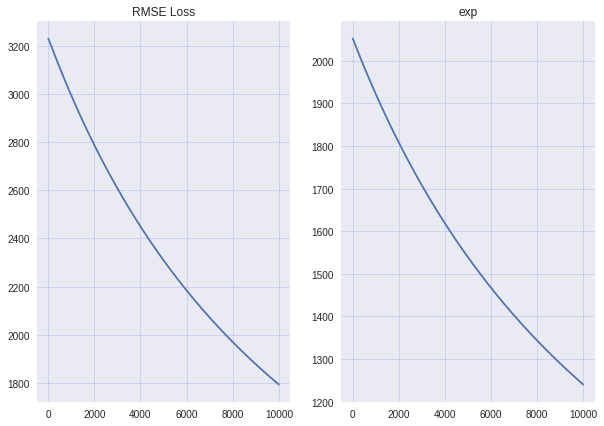

In [13]:

plot_results(loss_history, exp_history)

In [14]:
import tensorflow as tf

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our fuction"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    # Training loop
    for i in range(0, 500):
        print("Iteration %d" % i)
        # Run a single trainig step
        curr_loss, curr_exp, _ = sess.run([loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        
        print("loss = %s" % curr_loss)
        print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)

Iteration 0
loss = 12512.608
exp = 3.8507838
Iteration 1
loss = 8760.296
exp = 3.745928
Iteration 2
loss = 6812.7197
exp = 3.664095
Iteration 3
loss = 5594.976
exp = 3.596656
Iteration 4
loss = 4754.1777
exp = 3.5391552
Iteration 5
loss = 4135.8813
exp = 3.4889624
Iteration 6
loss = 3660.7595
exp = 3.444385
Iteration 7
loss = 3283.5522
exp = 3.4042656
Iteration 8
loss = 2976.4314
exp = 3.367776
Iteration 9
loss = 2721.292
exp = 3.3343015
Iteration 10
loss = 2505.82
exp = 3.3033733
Iteration 11
loss = 2321.3354
exp = 3.2746253
Iteration 12
loss = 2161.5361
exp = 3.2477658
Iteration 13
loss = 2021.7334
exp = 3.2225583
Iteration 14
loss = 1898.3611
exp = 3.1988087
Iteration 15
loss = 1788.6598
exp = 3.1763554
Iteration 16
loss = 1690.4579
exp = 3.1550624
Iteration 17
loss = 1602.0239
exp = 3.1348145
Iteration 18
loss = 1521.9587
exp = 3.1155126
Iteration 19
loss = 1449.12
exp = 3.0970714
Iteration 20
loss = 1382.5651
exp = 3.0794165
Iteration 21
loss = 1321.5087
exp = 3.062483
Iteration 2

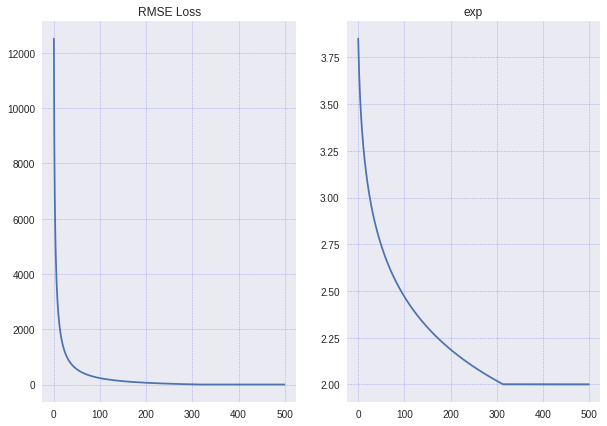

In [15]:
plot_results(loss_history, exp_history)

In [16]:
import tensorflow as tf
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our fuction"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# Summaries (NEW)
loss_summary = tf.summary.scalar("loss", loss)
exp_summary = tf.summary.scalar("exp", exp_hat)
all_summaries = tf.summary.merge_all()

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    summary_writer = tf.summary.FileWriter('./tensorboard', sess.graph)
    
    # Training loop
    for i in range(0, 500):
        print("Iteration %d" % i)
        # Run a single trainig step
        summaries, curr_loss, curr_exp, _ = sess.run([all_summaries, loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        
        print("loss = %s" % curr_loss)
        print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)
        
        summary_writer.add_summary(summaries, i)

Iteration 0
loss = 11986.109
exp = 3.8576877
Iteration 1
loss = 8544.126
exp = 3.755881
Iteration 2
loss = 6700.843
exp = 3.6757648
Iteration 3
loss = 5530.8755
exp = 3.609415
Iteration 4
loss = 4715.7104
exp = 3.5526564
Iteration 5
loss = 4112.576
exp = 3.502994
Iteration 6
loss = 3647.0366
exp = 3.458809
Iteration 7
loss = 3276.182
exp = 3.4189866
Iteration 8
loss = 2973.4243
exp = 3.3827262
Iteration 9
loss = 2721.3657
exp = 3.349431
Iteration 10
loss = 2508.1135
exp = 3.3186445
Iteration 11
loss = 2325.2537
exp = 3.290009
Iteration 12
loss = 2166.658
exp = 3.2632391
Iteration 13
loss = 2027.753
exp = 3.2381034
Iteration 14
loss = 1905.0552
exp = 3.2144108
Iteration 15
loss = 1795.8588
exp = 3.1920028
Iteration 16
loss = 1698.0358
exp = 3.1707454
Iteration 17
loss = 1609.8827
exp = 3.1505249
Iteration 18
loss = 1530.0233
exp = 3.1312437
Iteration 19
loss = 1457.3314
exp = 3.1128175
Iteration 20
loss = 1390.8773
exp = 3.095173
Iteration 21
loss = 1329.8855
exp = 3.0782456
Iteration 2

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# download and transform train dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

# download and transform test dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

class CNNClassifier(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        # input is 28x28x1
        # conv1(kernel=5, filters=10) 28x28x10 -> 24x24x10
        # max_pool(kernel=2) 24x24x10 -> 12x12x10
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        
        # conv2(kernel=5, filters=20) 12x12x20 -> 8x8x20
        # max_pool(kernel=2) 8x8x20 -> 4x4x20
        x = F.relu(F.max_pool2d(self.dropout(self.conv2(x)), 2))
        
        # flatten 4x4x20 = 320
        x = x.view(-1, 320)
        
        # 320 -> 50
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        
        # 50 -> 10
        x = self.fc2(x)
        
        # transform to logits
        reutrn F.log_softmax(x)

SyntaxError: ignored